<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

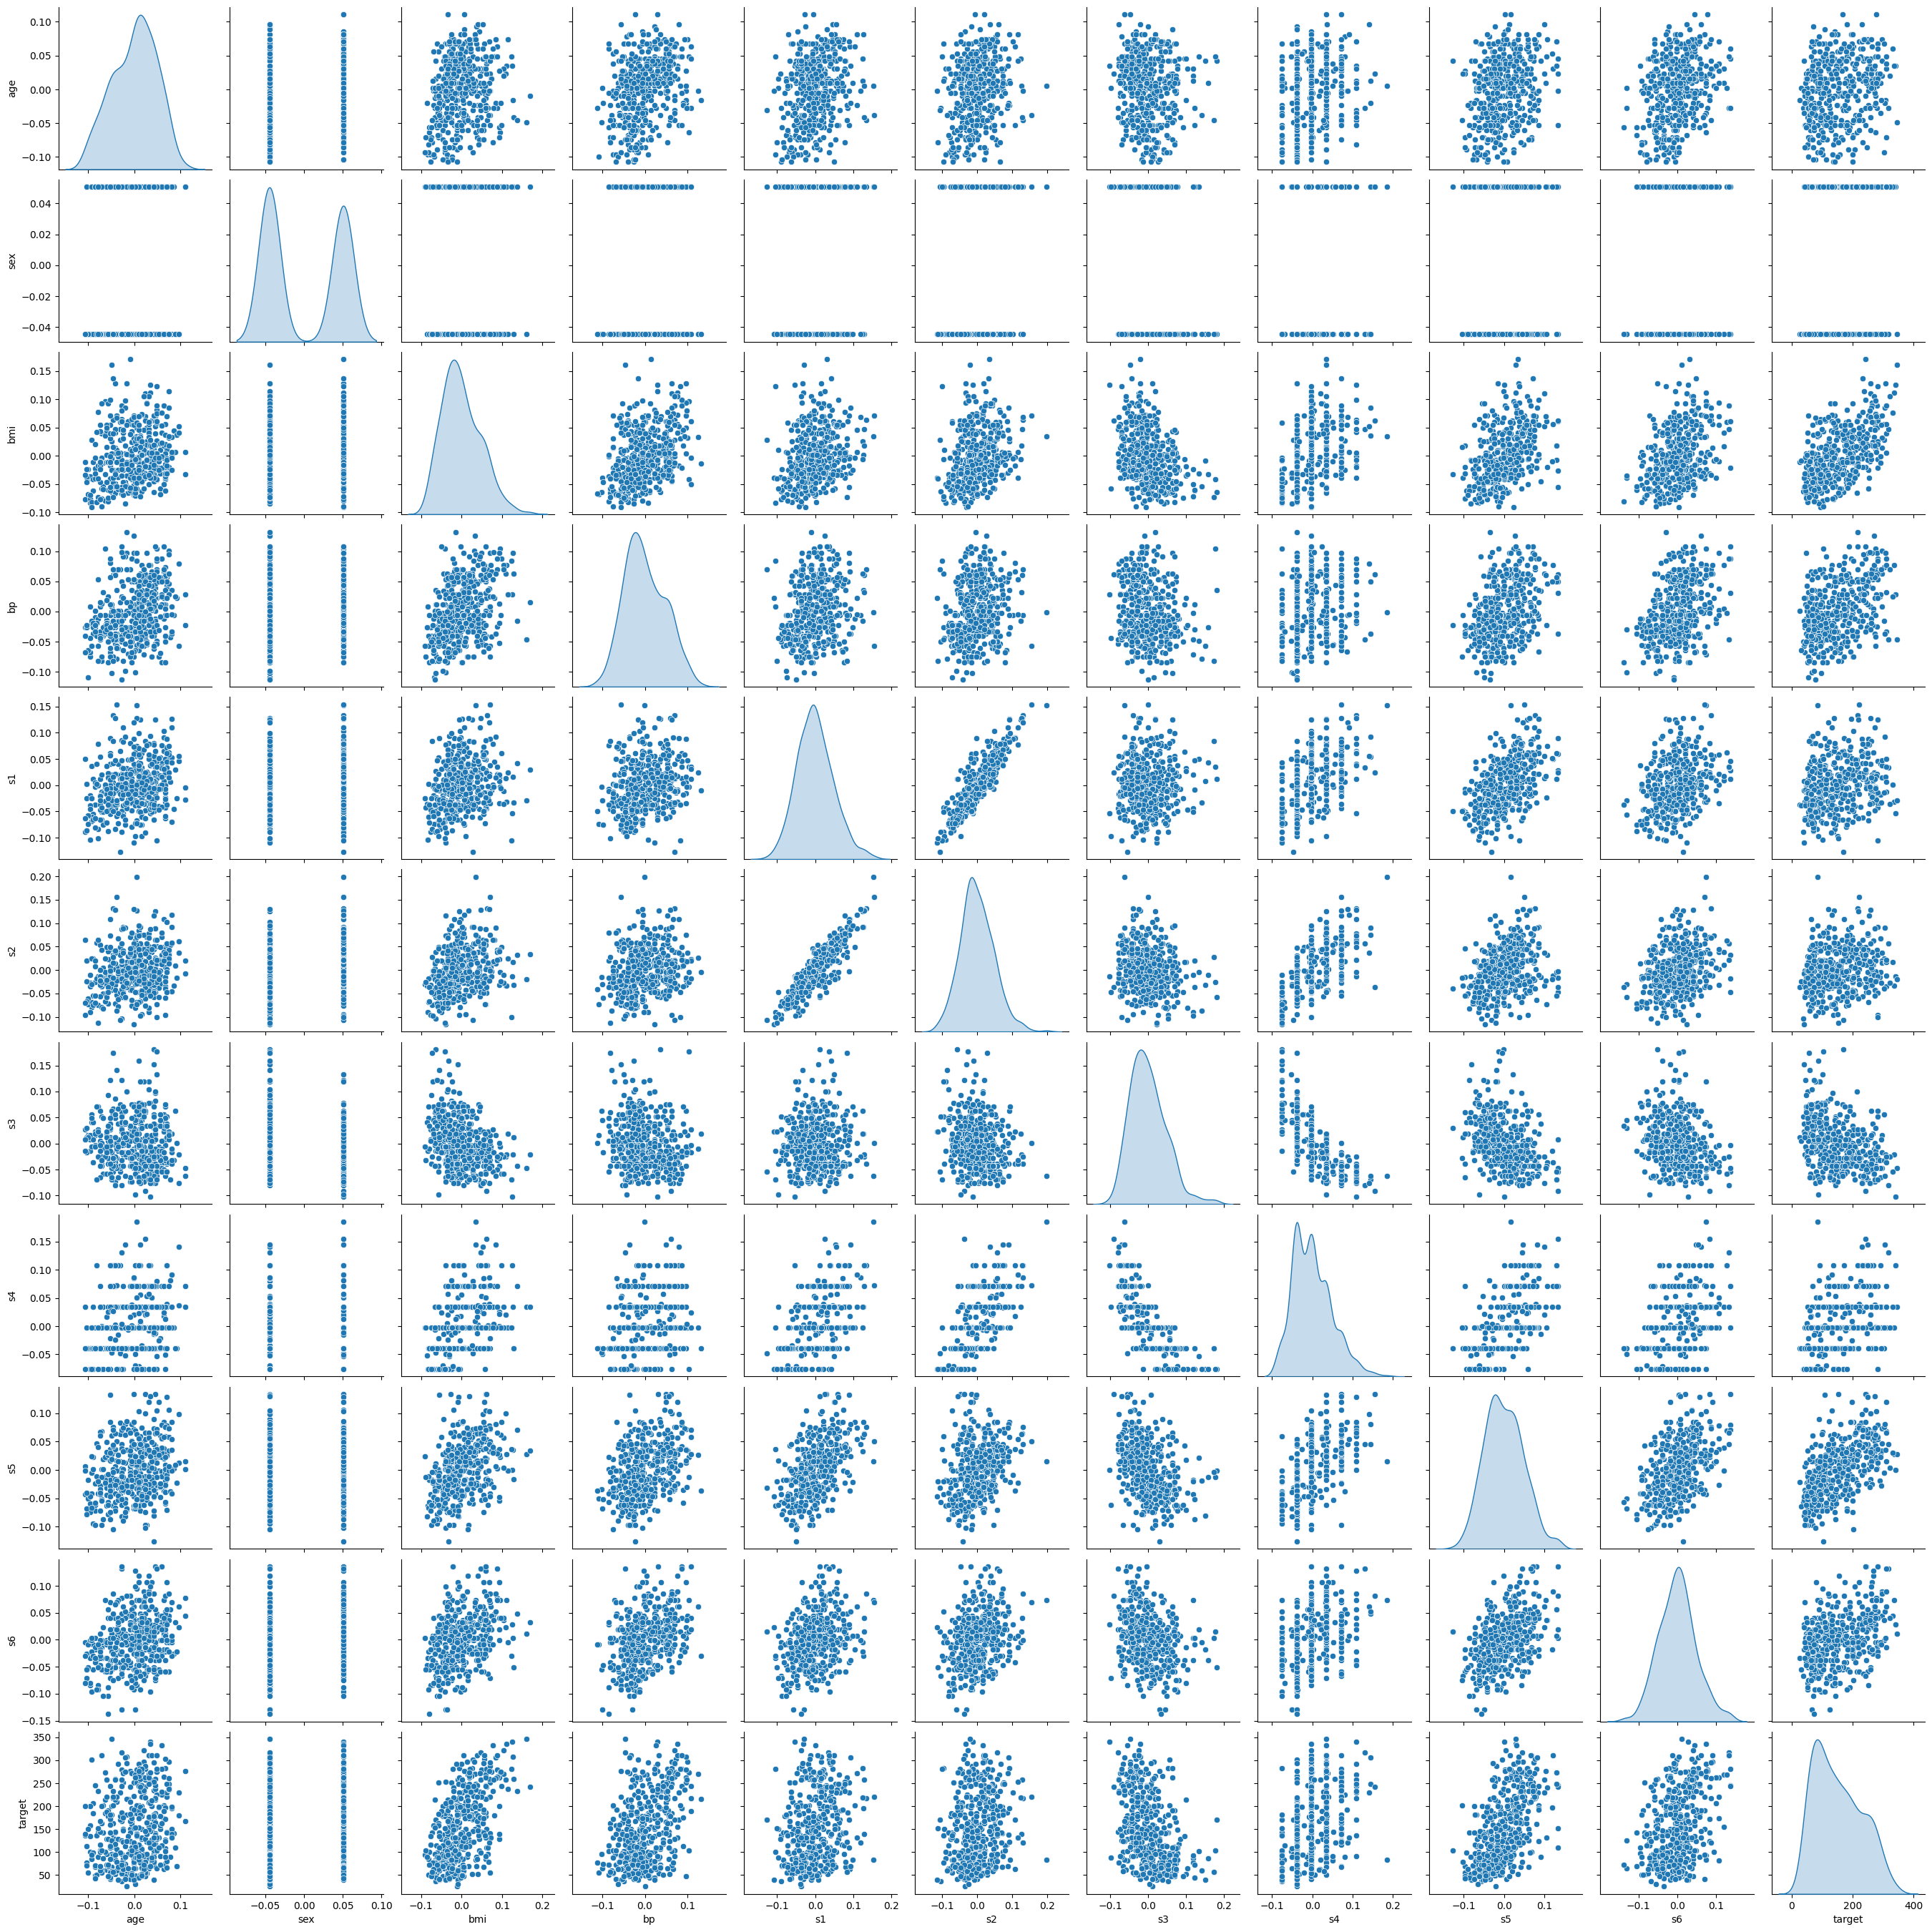

In [1]:
# Step 1: Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Explore dataset
print(df.info())
print(df.describe())
sns.pairplot(df, diag_kind='kde')
plt.show()


MAE: 52.25997644534553
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R²: 0.23335039815872138


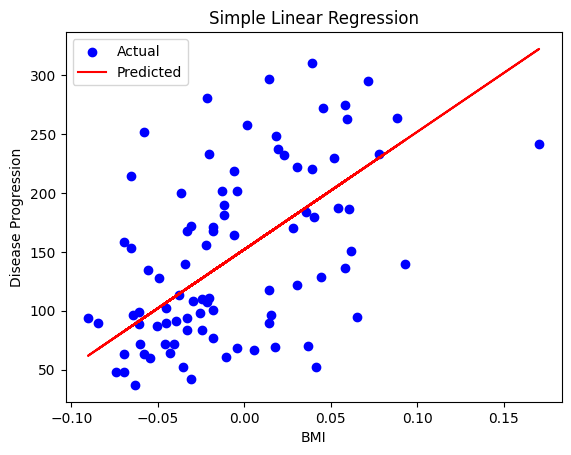

In [2]:
# Step 2: Simple Linear Regression (using BMI as feature)
X_bmi = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


MAE: 42.79409467959994
MSE: 2900.19362849348
RMSE: 53.853445836765914
R²: 0.4526027629719197


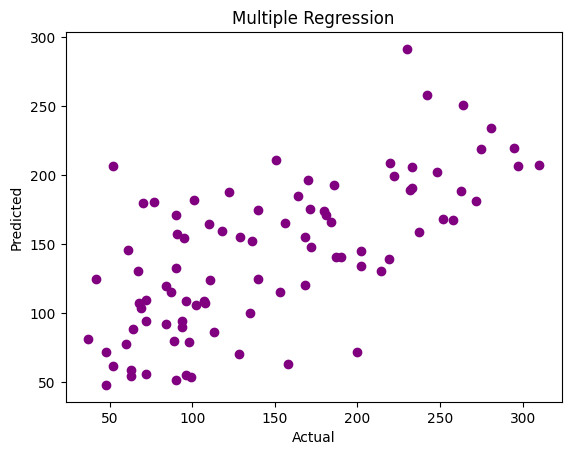

In [3]:
# Step 3: Multiple Regression
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))
print("R²:", r2_score(y_test, y_pred_multi))

plt.scatter(y_test, y_pred_multi, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression')
plt.show()


In [4]:
# Step 4: Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)
y_pred_poly = poly_lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R²:", r2_score(y_test, y_pred_poly))


MAE: 43.581693254652535
MSE: 3096.028307344272
RMSE: 55.641965344012355
R²: 0.4156399336408001


Ridge - MAE: 46.12414580545579
Ridge - RMSE: 55.45387476413351
Ridge - R²: 0.41958396582030866
Lasso - MAE: 42.85442771664998
Lasso - RMSE: 52.897953506442185
Lasso - R²: 0.4718547867276227


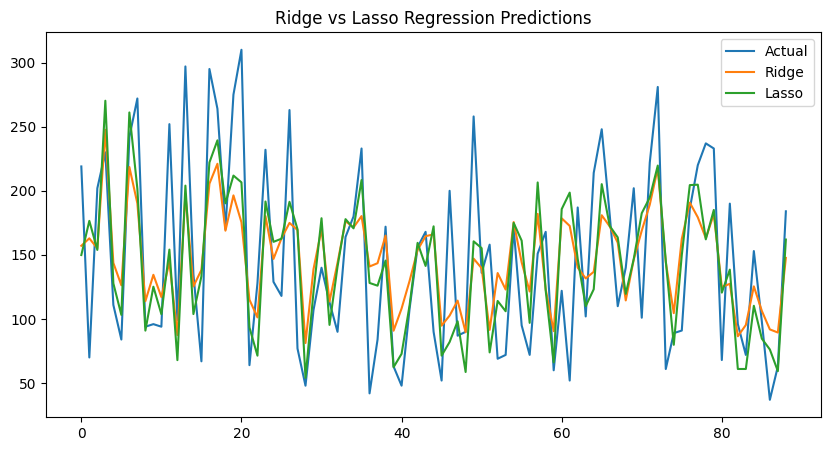

In [5]:
# Step 5: Ridge and Lasso Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Ridge - MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge - R²:", r2_score(y_test, y_pred_ridge))

print("Lasso - MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso - R²:", r2_score(y_test, y_pred_lasso))

# Visualize
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_ridge, label='Ridge')
plt.plot(y_pred_lasso, label='Lasso')
plt.legend()
plt.title('Ridge vs Lasso Regression Predictions')
plt.show()
